# 1. Install Dependencies and Setup

In [2]:
pip install tensorflow==2.11.0


Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip list

Package                       Version
----------------------------- --------
absl-py                       1.4.0
astor                         0.7.1
astunparse                    1.6.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
brotlipy                      0.7.0
cachetools                    5.3.1
certifi                       2023.5.7
cffi                          1.15.1
charset-normalizer            2.1.1
click                         8.0.3
colorama                      0.4.6
comtypes                      1.1.14
cryptography                  3.4.8
cycler                        0.11.0
debugpy                       1.6.3
decorator                     5.1.1
docutils                      0.16
entrypoints                   0.4
et-xmlfile                    1.1.0
flatbuffers                   23.5.26
gast                          0.3.3
google-auth                   2.21.0
google-auth-oauthlib          0.4.6
google-pasta                  0.2.0
grpcio           

In [29]:
import tensorflow as tf
import os

In [3]:
import tensorflow as tf
print(tf.__version__)


2.11.0


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [10]:
import cv2
import imghdr
import os

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 715 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

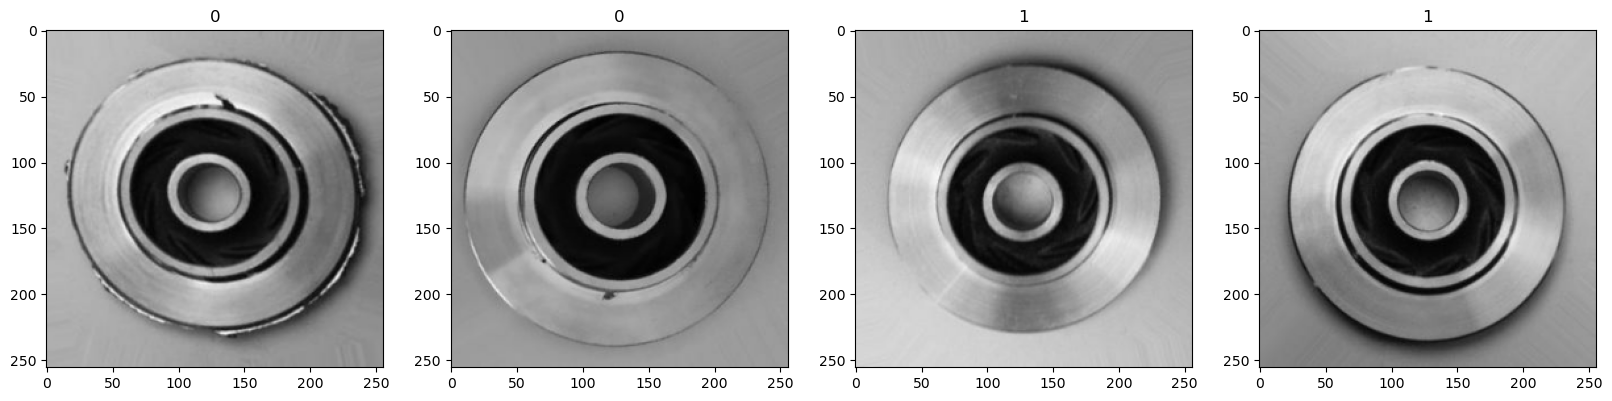

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
data.as_numpy_iterator().next()

(array([[[[0.63529414, 0.63529414, 0.63529414],
          [0.63428307, 0.63428307, 0.63428307],
          [0.6296875 , 0.6296875 , 0.6296875 ],
          ...,
          [0.6424632 , 0.6424632 , 0.6424632 ],
          [0.6422131 , 0.6422131 , 0.6422131 ],
          [0.63884974, 0.63884974, 0.63884974]],
 
         [[0.63520724, 0.63520724, 0.63520724],
          [0.6335327 , 0.6335327 , 0.6335327 ],
          [0.6296875 , 0.6296875 , 0.6296875 ],
          ...,
          [0.63226104, 0.63226104, 0.63226104],
          [0.63010085, 0.63010085, 0.63010085],
          [0.63027465, 0.63027465, 0.63027465]],
 
         [[0.63495713, 0.63495713, 0.63495713],
          [0.6313726 , 0.6313726 , 0.6313726 ],
          [0.63041157, 0.63041157, 0.63041157],
          ...,
          [0.62352943, 0.62352943, 0.62352943],
          [0.62352943, 0.62352943, 0.62352943],
          [0.627114  , 0.627114  , 0.627114  ]],
 
         ...,
 
         [[0.75719976, 0.75719976, 0.75719976],
          [0.76078

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

16

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 9s 468ms/step - loss: 0.9853 - accuracy: 0.6426 - val_loss: 0.6826 - val_accuracy: 0.6016
Epoch 2/20
16/16 [==============================] - 7s 432ms/step - loss: 0.6569 - accuracy: 0.6348 - val_loss: 0.6153 - val_accuracy: 0.6797
Epoch 3/20
16/16 [==============================] - 7s 422ms/step - loss: 0.6292 - accuracy: 0.6465 - val_loss: 0.6536 - val_accuracy: 0.6484
Epoch 4/20
16/16 [==============================] - 7s 427ms/step - loss: 0.6129 - accuracy: 0.6445 - val_loss: 0.5890 - val_accuracy: 0.6797
Epoch 5/20
16/16 [==============================] - 7s 427ms/step - loss: 0.5352 - accuracy: 0.7148 - val_loss: 0.5400 - val_accuracy: 0.6562
Epoch 6/20
16/16 [==============================] - 7s 440ms/step - loss: 0.4947 - accuracy: 0.7988 - val_loss: 0.5004 - val_accuracy: 0.7109
Epoch 7/20
16/16 [==============================] - 7s 430ms/step - loss: 0.5033 - accuracy: 0.7637 - val_loss: 0.4276 - val_accuracy: 0.8516
Epoch 

# 8. Plot Performance

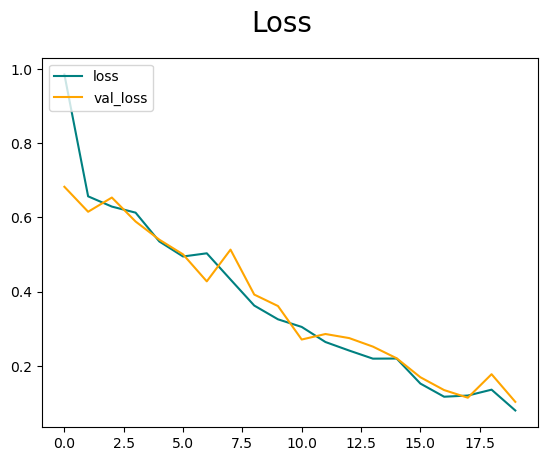

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

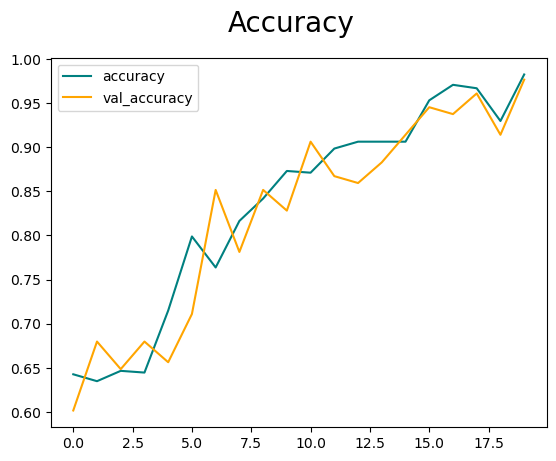

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 107ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.962963, shape=(), dtype=float32) tf.Tensor(0.9285714, shape=(), dtype=float32) tf.Tensor(0.953125, shape=(), dtype=float32)


# 10. Test

In [37]:
import cv2

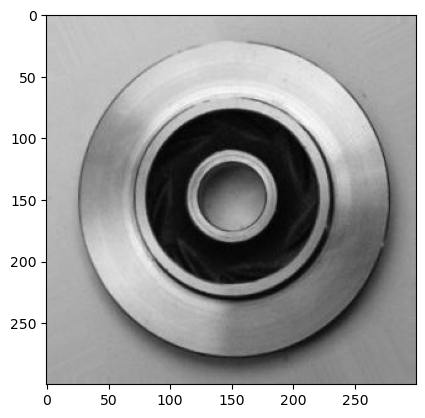

In [52]:
img = cv2.imread(r'C:\Users\LEOPARD\Desktop\ImageClassification-main\data\ok_front\cast_ok_0_9996.jpeg')
plt.imshow(img)
plt.show()

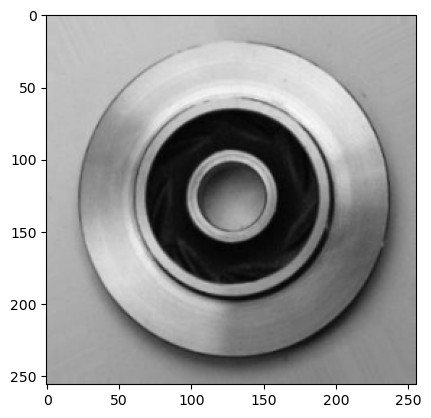

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [56]:
yhat

array([[0.7850923]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is ok')
else:
    print(f'Predicted class is def')

Predicted class is ok


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)